### Initialization

In [1]:
from polymorph_s2df import *
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

def render(shape, bounds=(-3, 3), n=500):
    x = jnp.linspace(bounds[0], bounds[1], n)
    X, Y = jnp.meshgrid(x, x)

    grid_points = jnp.column_stack((X.flatten(), Y.flatten()))
    vec_is_inside = (lambda x: 1 - shape.is_inside(x))
    plt.imshow(vec_is_inside(grid_points).reshape(n, n), cmap="gray", origin="lower", extent=[bounds[0], bounds[1],bounds[0], bounds[1]])


def render_distance(shape, bounds=(-3, 3), n=500):
    x = jnp.linspace(bounds[0], bounds[1], n)
    X, Y = jnp.meshgrid(x, x)

    grid_points = jnp.column_stack((X.flatten(), Y.flatten()))
    sdf = (shape.distance)

    values = sdf(grid_points).reshape(n, n)
    
    fig1, ax2 = plt.subplots(layout='constrained')

    levels = jnp.linspace(-5, 5, 41)

    ax2.axis('equal')
    ax2.contourf(X, Y, values, levels=levels, cmap="PRGn", origin="lower", extent=[bounds[0], bounds[1],bounds[0], bounds[1]])
    ax2.contour(X, Y, values, levels=levels, colors="k", origin="lower", extent=[bounds[0], bounds[1],bounds[0], bounds[1]])


### Playground

In [2]:
c = Circle(2).substract(Circle(0.5)).substract(Box(2.3, 0.2).translate(p(1, 0)))

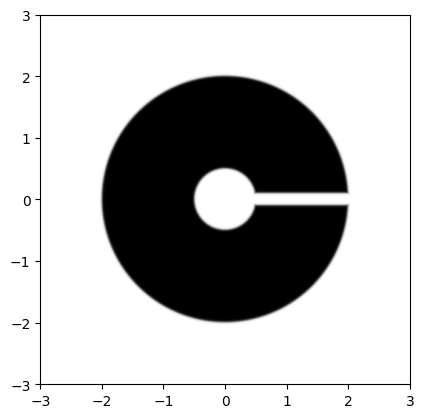

In [3]:
render(c, p(-3, 3))

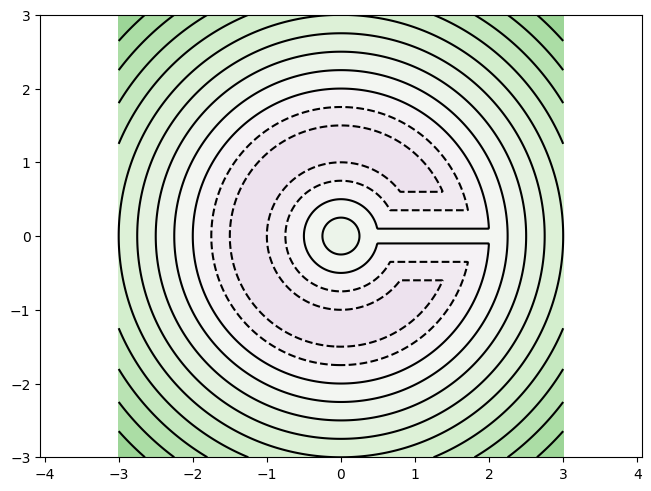

In [4]:
render_distance(c, p(-3, 3))

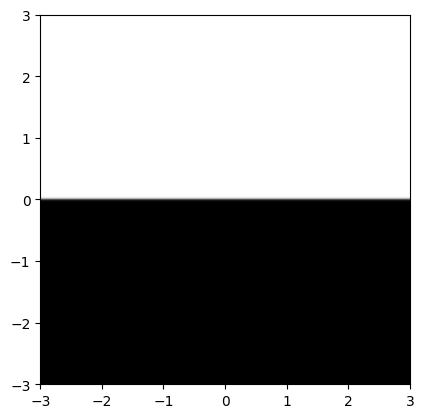

In [5]:
render(BottomHalfPlane(), p(-3, 3))

In [6]:
polygon([p(2, 1.1), p(-2.1, -2), p(-1, 2.9), p(0.5, 1)])

ClosedPath(
  LineSegment([2.  1.1], [-2.1 -2. ])
  LineSegment([-2.1 -2. ], [-1.   2.9])
  LineSegment([-1.   2.9], [0.5 1. ])
  LineSegment([0.5 1. ], [2.  1.1])
)

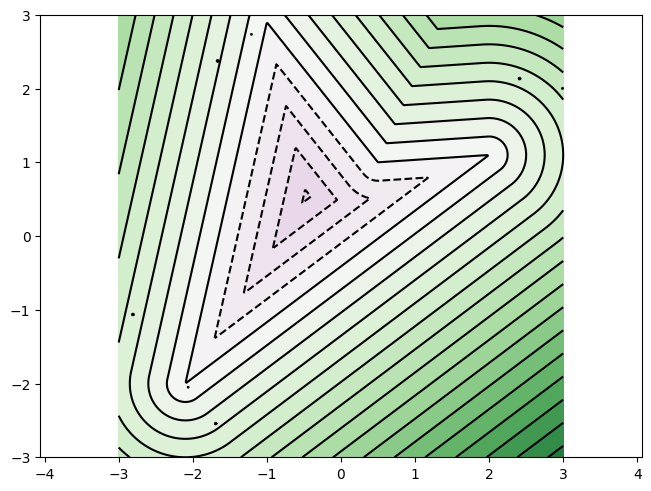

In [7]:
render_distance(polygon([p(2, 1.1), p(-2.1, -2), p(-1, 2.9), p(0.5, 1)]), [-3, 3])

For some reason I get artifacts - some points on lines perpendicular to angles seem to be set to zero.

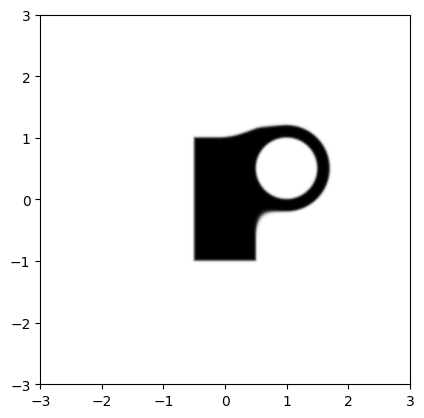

In [15]:
class Combination(Shape):
    def __init__(self, r, shape_2):
        self.r = r
        self.shape_2 = shape_2

    def distance(self, p):
        return jnp.abs(self.shape_2.distance(p)) - self.r


box = Box(1, 2)
circle = Circle(0.5).translate(p(1, 0.5))
shape = box.smooth_union(0.13, circle.dilate(0.2)).substract(circle)
render(shape)